In [1]:
!pip install nltk

In [2]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\SHRI
[nltk_data]     DHARSHINI M\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Sample text data
data = {
    'text': [
        "I don't like programming!",
        "Python is not amazing.",
        "good morning",
        "Debugging is frustrating.",
        "I feel indifferent about documentation.",
        "This is the worst day ever!",
        "I'm so sad about the news."
    ]
}

df = pd.DataFrame(data)

In [4]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [5]:
# Function to analyze sentiment and return score and label
def analyze_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        sentiment = 'Positive'
    elif score['compound'] <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    return score['compound'], sentiment

# Apply function to DataFrame
df[['sentiment_score', 'sentiment_label']] = df['text'].apply(analyze_sentiment).apply(pd.Series)

In [6]:
print(df)

                                      text  sentiment_score sentiment_label
0                I don't like programming!          -0.3404        Negative
1                   Python is not amazing.          -0.4717        Negative
2                             good morning           0.4404        Positive
3                Debugging is frustrating.          -0.4404        Negative
4  I feel indifferent about documentation.          -0.2023        Negative
5              This is the worst day ever!          -0.6588        Negative
6               I'm so sad about the news.          -0.5256        Negative


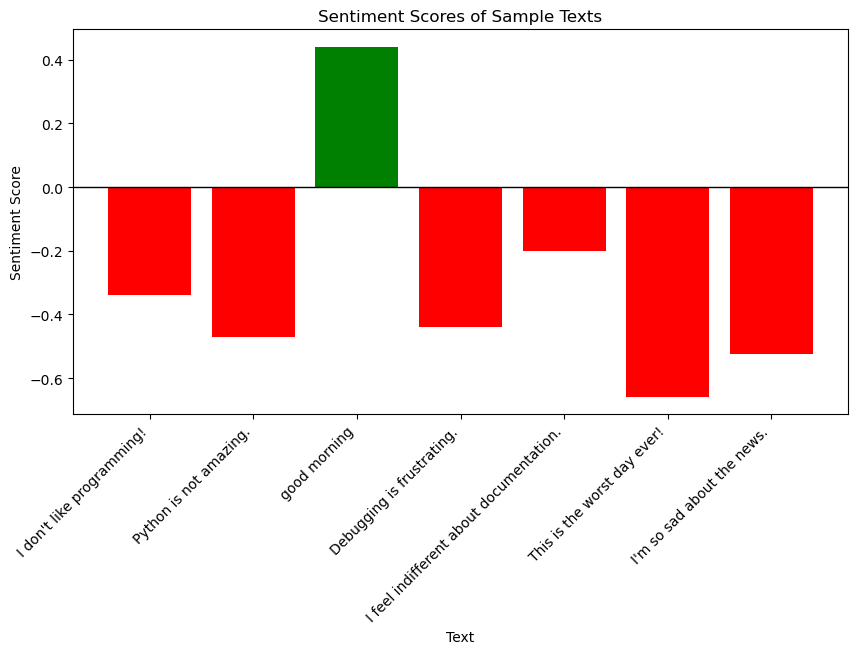

In [7]:
# Plotting sentiment scores
plt.figure(figsize=(10, 5))
plt.bar(df['text'], df['sentiment_score'], color=['green' if x == 'Positive' else 'red' if x == 'Negative' else 'gray' for x in df['sentiment_label']])
plt.xticks(rotation=45, ha='right')
plt.title('Sentiment Scores of Sample Texts')
plt.xlabel('Text')
plt.ylabel('Sentiment Score')
plt.axhline(0, color='black', lw=1)
plt.show()